In [1]:
import sys
sys.path.append("..")
from functions.functions import * 
from decision_tree_from_scratch.Decision_Tree import * 

# Preprocessing

In [2]:
X_train, X_test, X_val, y_train, y_test, y_val = preprocess(file_paths)

# Feature Selection

In [3]:
# Selected Features
selected_features = ['minimum_nights', 
                     'number_of_reviews', 
                     'reviews_per_month', 
                     'calculated_host_listings_count', 
                     'availability_365',
                     'Host Response Rate', 
                     'Accommodates', 
                     'Bathrooms', 
                     'Bedrooms', 
                     'Beds', 
                     'Square Feet',
                     'recency_last_review' ,
                     'last_review_day', 
                     'last_review_month', 
                     'last_review_year', 
                     'room_type_Entire home/apt', 
                     'room_type_Private room', 
                     'room_type_Shared room',
                     'mean_target_neighbourhood',
                     'mean_target_neighbourhood_group',
                     'neighbourhood_group_Bronx', 
                     'neighbourhood_group_Brooklyn',
                     'neighbourhood_group_Manhattan',
                     'neighbourhood_group_Queens',
                     'neighbourhood_group_Staten Island',
                     'x', 
                     'y', 
                     'z',
                     'text_encoding_tsne_1',
                     'text_encoding_tsne_2']


# Prepare feature matrices
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_val_selected = X_val[selected_features]

X_train_np = X_train_selected.to_numpy()
X_test_np = X_test_selected.to_numpy()
X_val_np = X_val_selected.to_numpy()

scaler = MinMaxScaler()
X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.transform(X_test_np)
X_val_np = scaler.transform(X_val_np)

y_train_np = y_train.to_numpy().flatten()
y_test_np = y_test.to_numpy().flatten()
y_val_np = y_val.to_numpy().flatten()

X_test_selected.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,...,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,x,y,z,text_encoding_tsne_1,text_encoding_tsne_2
27357,3,4,2.45,1,23,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,0,1,0,0,0.208824,-0.728089,0.652900,-7.517027,-0.076676
17998,1,35,2.75,10,156,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,0,1,0,0,0.208893,-0.728482,0.652440,-7.517027,-0.076676
11703,3,16,0.62,4,37,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,1,0,0,0,0.209660,-0.728891,0.651737,-7.517027,-0.076676
25026,1,0,0.00,10,284,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,0,1,0,0,0.208956,-0.727793,0.653188,-7.517027,-0.076676
31283,1,0,0.00,1,43,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,1,0,0,0,0.209579,-0.728689,0.651989,-7.517027,-0.076676


# Homemade Decision tree

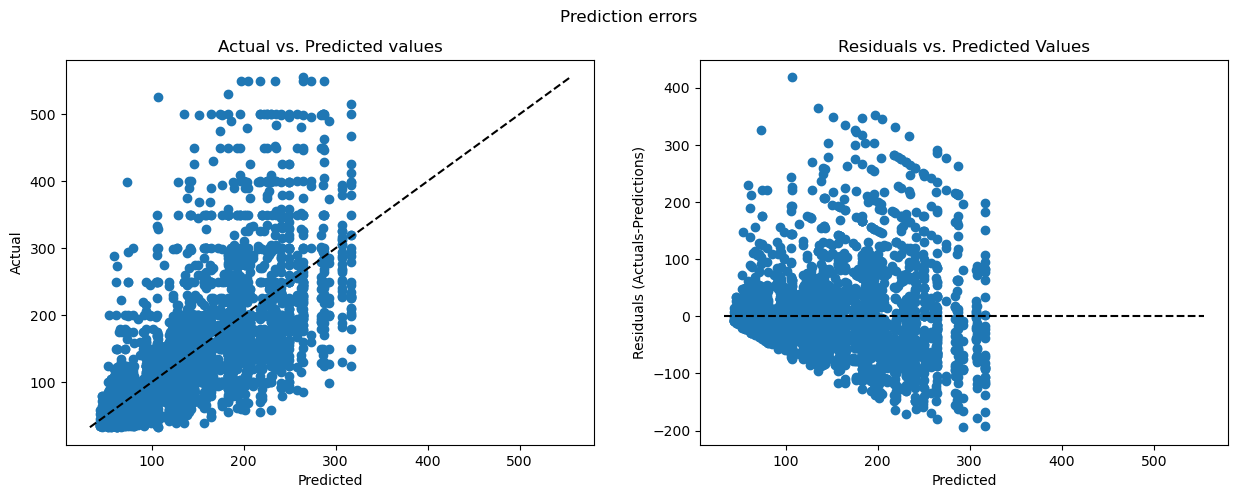

R²: 0.4900511582827498
MAE: 44.813513576971495
MSE: 4562.136114663673
RMSE: 67.54358677671532
MAPE: 0.35170080928108993
error_ratio_rmse: 0.4883511084882642
error_ratio_mae: 0.32400898552980534


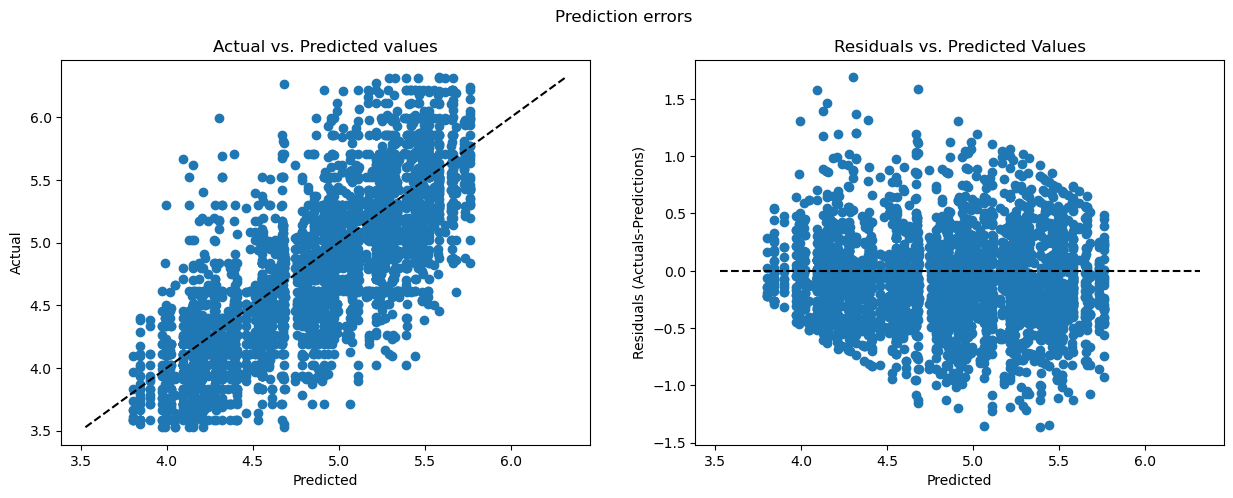

R²: 0.5932714607013829
MAE: 0.31148947297464163
MSE: 0.15806706579612842
RMSE: 0.3975764904972733
MAPE: 0.06699386146961543
error_ratio_rmse: 0.08391005088316061
error_ratio_mae: 0.06574105398983676


In [6]:
model_init = HomemadeDecisionTreeRegressor(min_samples_split=82,max_depth=10)

load_tree = True
if load_tree == True:
    model_init.load_tree(load_params('saved_models/homemade_tree_params.json'))
else:
    model_init.fit(X_train_np, y_train_np)

y_pred = np.maximum(0,model_init.predict(X_test_np))

# score for price
model_init_score=scores(y_test_np,y_pred,plot= True)

# score for log_price
model_init_logscore=scores(np.log(y_test_np+1),np.log(y_pred+1),plot= True)

# Visualize Tree

In [9]:
model_init.tree

{'split_feature': 15,
 'split_value': 0.5,
 'left': {'split_feature': 18,
  'split_value': 0.3871387274943374,
  'left': {'split_feature': 18,
   'split_value': 0.22717602398260683,
   'left': {'split_feature': 11,
    'split_value': 0.0057500229084578025,
    'left': {'split_feature': 0,
     'split_value': 0.004403522818254603,
     'left': {'split_feature': 25,
      'split_value': 0.5922453300850137,
      'left': {'split_feature': 1,
       'split_value': 0.010887772194304857,
       'left': {'split_feature': 4,
        'split_value': 0.08653846153846154,
        'left': 63.58,
        'right': {'split_feature': 18,
         'split_value': 0.11097944615855504,
         'left': 68.35964912280701,
         'right': {'split_feature': 11,
          'split_value': 0.0013172363236506925,
          'left': 81.32673267326733,
          'right': 71.5925925925926}}},
       'right': {'split_feature': 4,
        'split_value': 0.06730769230769232,
        'left': {'split_feature': 25,
      

In [7]:
model_init.visualize_tree()

AttributeError: 'dict' object has no attribute 'is_leaf_node'

# Comparison with Sklearn's tuned model

Our Decision Tree developed from scratch shows better results than the tuned model from sklearn.


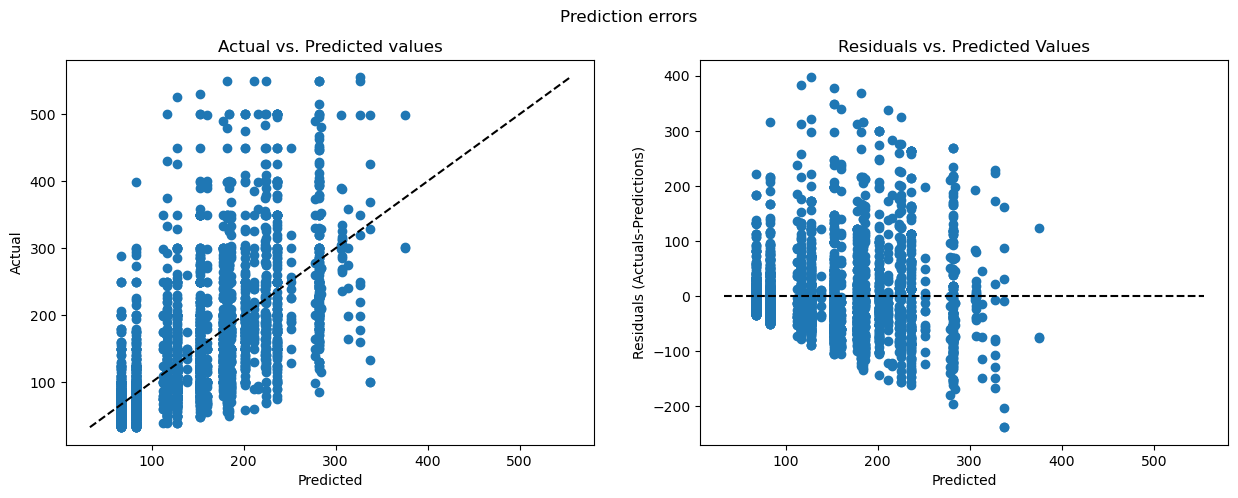

R²: 0.47807739666812765
MAE: 45.8255977175727
MSE: 4669.256527186797
RMSE: 68.33195831517487
MAPE: 0.3711947323149145
error_ratio_rmse: 0.4940511628247337
error_ratio_mae: 0.33132651833391724


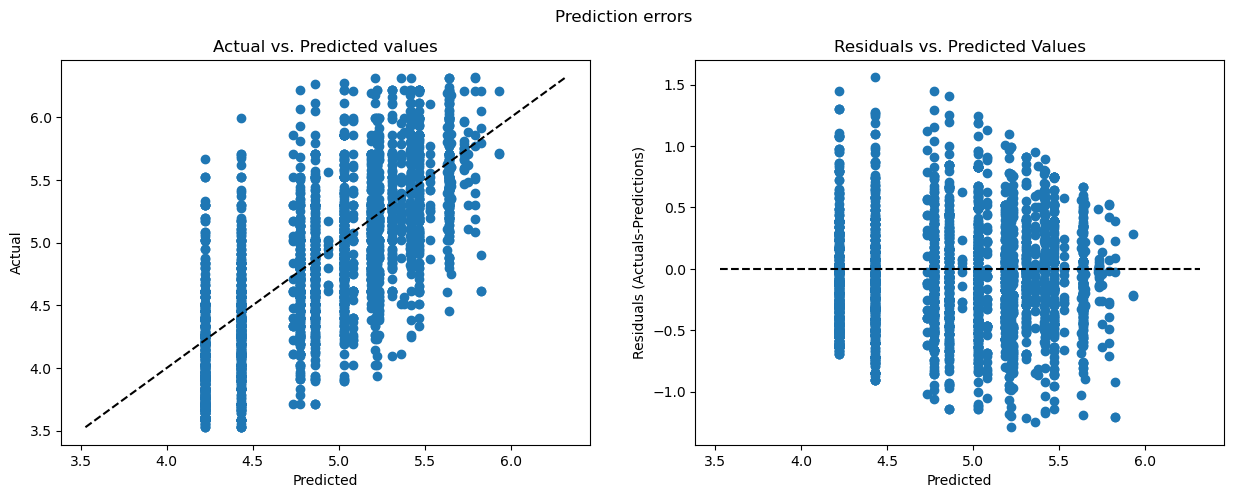

R²: 0.563765374803777
MAE: 0.3262907755608963
MSE: 0.16953402709912874
RMSE: 0.4117450996661997
MAPE: 0.07073247685933891
error_ratio_rmse: 0.08690039046491309
error_ratio_mae: 0.06886492595620043


In [11]:
best_hyperparams = {'max_depth': 29.0,
                     'max_features': 0.9959223533384182,
                     'max_leaf_nodes': 30.0,
                     'min_impurity_decrease': 0.1506578136299364,
                     'min_samples_leaf': 14.0,
                     'min_samples_split': 82.0,
                     'random_state': 631.0}

model_tuned = DecisionTreeRegressor(
                              max_depth =int(best_hyperparams['max_depth']), 
                              min_samples_split = int(best_hyperparams['min_samples_split']), 
                              max_features = best_hyperparams['max_features'],
                              min_impurity_decrease = best_hyperparams['min_impurity_decrease'],
                              min_samples_leaf=int(best_hyperparams['min_samples_leaf']),
                              max_leaf_nodes=int(best_hyperparams['max_leaf_nodes']),
                              random_state = int(best_hyperparams['random_state']),
                              criterion = 'squared_error'
                       )

model_tuned.fit(X_train_np, y_train_np)

y_pred = np.maximum(0,model_tuned.predict(X_test_np))
model_tuned_score = scores(y_test_np,y_pred,plot=True)
model_tuned_logscore= scores(np.log(y_test_np+1),np.log(y_pred+1),plot= True)

# Save Model

In [12]:
dt_params = model_init.tree

# Save the parameters as a JSON file
with open('saved_models/homemade_tree_params.json', 'w') as f:
    json.dump(dt_params, f)

# Save the parameters as a JSON file
with open('saved_scores/homemade_decision_tree_score.json', 'w') as f:
    json.dump(model_init_score, f)